<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [302]:
# Import torch
import torch

# Setup device agnostic code


# Setup random seed
RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors. 
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [303]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons
X,y = make_moons(10000,
                 noise=0.1,random_state=42)



In [304]:
"""from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000,
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)"""
print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


In [305]:
# Turn data into a DataFrame
import pandas as pd
moons= pd.DataFrame({ "X1":X[:,0],
                      "X2":X[:,1],
                      "label":y
                     })
moons.head(5)

,X1,X2,label
0,0.455493,-0.125503,1
1,-0.704217,0.041308,0
2,0.413799,0.791322,0
3,-0.864049,0.138754,0
4,-0.936268,0.359267,0


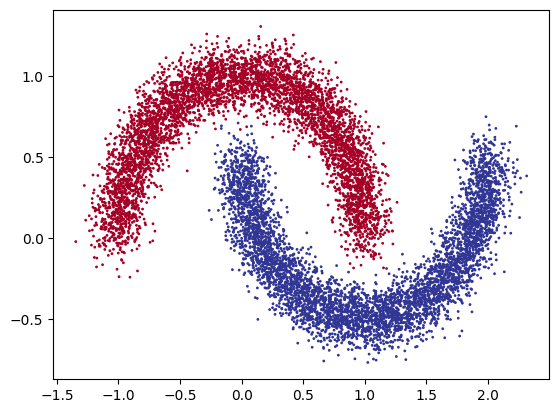

In [306]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt
plt.scatter(moons.X1,moons.X2,c=y,cmap=plt.cm.RdYlBu,s=1)

In [307]:
# Turn data into tensors of dtype float
X = torch.from_numpy(X).type(torch.float)
y =torch.from_numpy(y).type(torch.float)

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)
X_train[:5]

tensor([[-0.7192,  0.5510],
        [-0.7838,  0.8058],
        [ 0.0403,  0.0508],
        [-0.6512,  0.6078],
        [ 0.1251,  0.0745]])


## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [308]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        activation=nn.Tanh
        self.fcs = nn.Sequential(*[
                                    nn.Linear(2,30),
                                    activation()])
        self.fch1 = nn.Sequential(*[
                                    nn.Linear(30,20),
                                    activation()])
        self.fch2 = nn.Sequential(*[
                                    nn.Linear(20,5),
                                    activation()])
        self.fce = nn.Linear(5,1)

    def forward(self, x):
        x= self.fcs(x)
        x = self.fch2(self.fch1(x))
        x = self.fce(x)
        return x
# Instantiate the model
model_0= MoonModelV0()
model_0

MoonModelV0(
  (fcs): Sequential(
    (0): Linear(in_features=2, out_features=30, bias=True)
    (1): Tanh()
  )
  (fch1): Sequential(
    (0): Linear(in_features=30, out_features=20, bias=True)
    (1): Tanh()
  )
  (fch2): Sequential(
    (0): Linear(in_features=20, out_features=5, bias=True)
    (1): Tanh()
  )
  (fce): Linear(in_features=5, out_features=1, bias=True)
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [309]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()
# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [310]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [311]:
# Make predictions with the model
untrained_preds = model_0(X_test)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 2000, Shape: torch.Size([2000, 1])
Length of test samples: 2000, Shape: torch.Size([2000])

First 10 predictions:
tensor([[0.2477],
        [0.2590],
        [0.3091],
        [0.3028],
        [0.3097],
        [0.2792],
        [0.2792],
        [0.2701],
        [0.2840],
        [0.2732]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 1., 0., 1., 0., 1., 1., 1., 1., 1.])


In [312]:
# What's coming out of our model?
y_logits = model_0(X_test)[:5]
# logits (raw outputs of model)
print(f"Logits:{y_logits}")
## Your code here ##

# Prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
print(f"Pred probs:{y_pred_probs}")


# Prediction labels
# Find the predicted labels (round the prediction probabilities)
y_pred = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test)[:5]))

# Check for equality
print(torch.eq(y_pred.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension

print(f"Pred labels:{y_pred.squeeze()}")
## Your code here ##

Logits:tensor([[0.2477],
        [0.2590],
        [0.3091],
        [0.3028],
        [0.3097]], grad_fn=<SliceBackward0>)
Pred probs:tensor([[0.5616],
        [0.5644],
        [0.5767],
        [0.5751],
        [0.5768]], grad_fn=<SigmoidBackward0>)
tensor([True, True, True, True, True])
Pred labels:tensor([1., 1., 1., 1., 1.], grad_fn=<SqueezeBackward0>)


In [313]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2)# send accuracy function to device
acc_fn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


MulticlassAccuracy()

In [314]:
## TODO: Uncomment this to set the seed
##torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1000
losses=[]
# Send data to the device


# Loop through the data
for epoch in range(epochs):
  ### Training
    model_0.train()

  # 1. Forward pass (logits output)
    y_logits = model_0(X_train).squeeze()
  # Turn logits into prediction probabilities

    y_pred =torch.round(torch.sigmoid(y_logits))

  # 2. Calculaute the loss
    loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
    acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
    optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
    loss.backward()
    losses.append(loss.detach().flatten()[0])
  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression) 
  
    optimizer.step()
  ### Testing
    model_0.eval()
    with torch.inference_mode():
    # 1. Forward pass (to get the logits)
        test_logits = model_0(X_test).squeeze()
    # Turn the test logits into prediction labels
        test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Caculate the test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

  # Print out what's happening every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
    

Epoch: 0 | Loss: 0.71396, Accuracy: 0.50% | Test loss: 0.71134, Test acc: 49.35%
Epoch: 100 | Loss: 0.30385, Accuracy: 0.87% | Test loss: 0.27378, Test acc: 89.55%
Epoch: 200 | Loss: 0.26516, Accuracy: 0.89% | Test loss: 0.23147, Test acc: 90.70%
Epoch: 300 | Loss: 0.24104, Accuracy: 0.90% | Test loss: 0.20891, Test acc: 91.45%
Epoch: 400 | Loss: 0.17626, Accuracy: 0.93% | Test loss: 0.15205, Test acc: 94.80%
Epoch: 500 | Loss: 0.07079, Accuracy: 0.98% | Test loss: 0.06232, Test acc: 98.75%
Epoch: 600 | Loss: 0.03159, Accuracy: 1.00% | Test loss: 0.02840, Test acc: 99.65%
Epoch: 700 | Loss: 0.01917, Accuracy: 1.00% | Test loss: 0.01754, Test acc: 99.85%
Epoch: 800 | Loss: 0.01363, Accuracy: 1.00% | Test loss: 0.01269, Test acc: 99.85%
Epoch: 900 | Loss: 0.01057, Accuracy: 1.00% | Test loss: 0.01004, Test acc: 99.85%


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [315]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=4, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

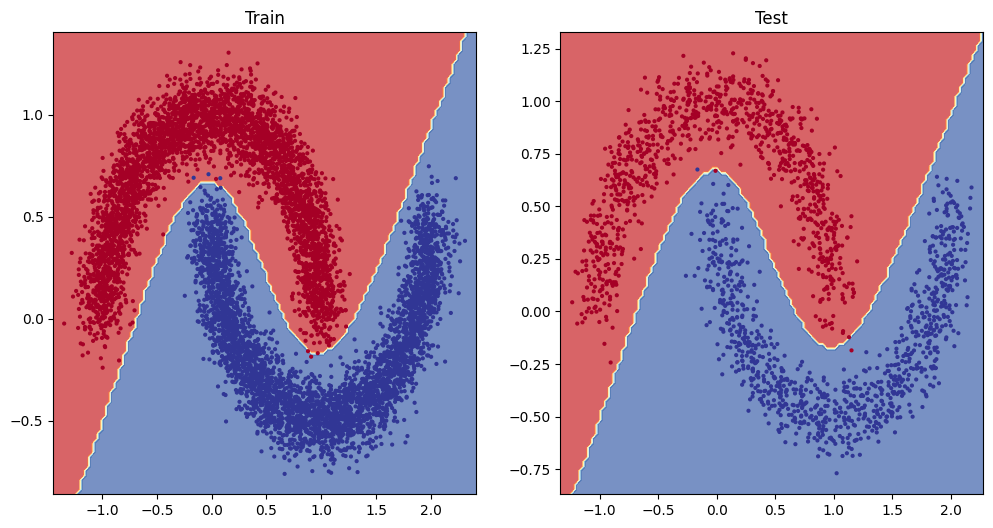

In [316]:
# Plot decision boundaries for training and test sets
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

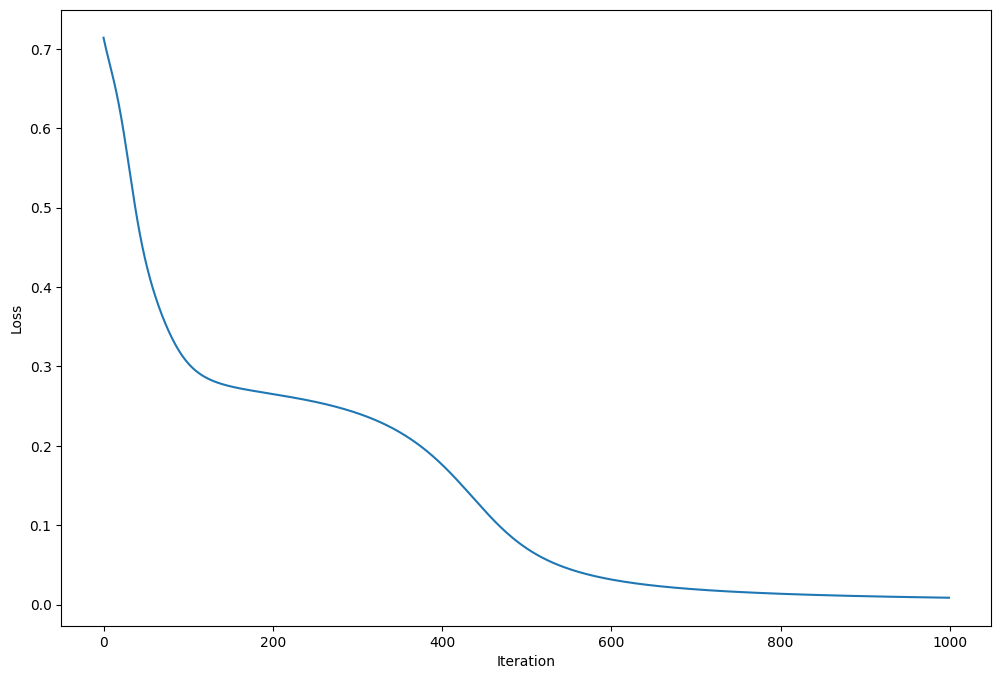

In [317]:
def show_loss(losses):
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(losses)), losses)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()
show_loss(losses)